In [8]:
from sqlalchemy import create_engine
from sqlalchemy import URL
from sqlalchemy import text
import pandas as pd
import numpy as np

In [3]:
url_object = URL.create(
    "mysql+mysqlconnector",
    username="root",
    password="",
    host="localhost"
    )
engin = create_engine(url_object)

query = ("SELECT * FROM flights;") 

with engin.connect() as conn:
    conn.execute(text("USE StatisticalAnalysis"))
    data = pd.read_sql(text(query), conn)

In [7]:
data.head(3)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.


In [12]:
np.shape(data)

(336776, 21)

In [13]:
data['arr_delay'].mean()

6.89537675731489

In [16]:
from scipy import stats
stats.trim_mean(data['arr_delay'], 0.1)

0.9612355338465307

In [17]:
data['arr_delay'].median()

-5.0

In [18]:
data['arr_delay'].mode()

0   -13.0
Name: arr_delay, dtype: float64

In [19]:
data['arr_delay'].var()

1992.13072710194

In [20]:
data['arr_delay'].std()

44.63329169019399

<AxesSubplot: >

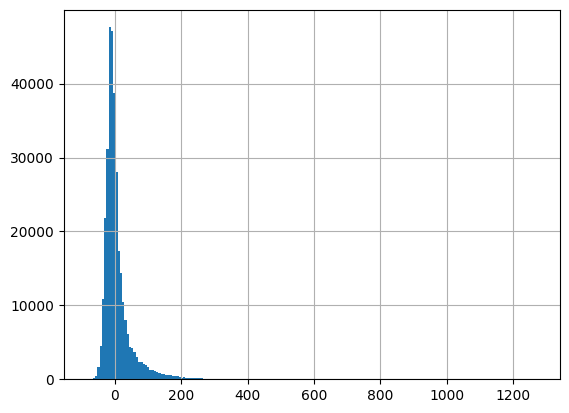

In [27]:
data['arr_delay'].hist(bins=200)